In [3]:
import numpy as np
import scipy.linalg as la
import quimb.tensor as qtn
import matplotlib.pyplot as plt
from decoder.sweepline import sweepline_contract

In [12]:
a1 = np.random.rand(2, 3)
t1 = qtn.Tensor(a1, ['a', 'b'])
a2 = np.random.rand(3, 1000, 50).astype(float)
t2 = qtn.Tensor(a2, ['b', 'c', 'd'])
a3 = np.random.rand(1000, 50).astype(float)
t3 = qtn.Tensor(a3, ['c', 'd'])

tensor_network = t1 & t2 & t3

In [13]:
bonds = []
norms = []
times_sweep = []
times_builtin = []
for max_bond in range(1, 1000):
    result = sweepline_contract(tensor_network, max_bond, 'k')
    builtin_result = tensor_network.contract()
    assert result.shape == builtin_result.data.shape
    result_reshaped = result.data.reshape(result.data.size)
    builtin_reshaped = builtin_result.data.reshape(builtin_result.data.size)
    bonds.append(max_bond)
    norms.append(la.norm(result_reshaped - builtin_reshaped))

Text(0, 0.5, 'absolute distance from exact result')

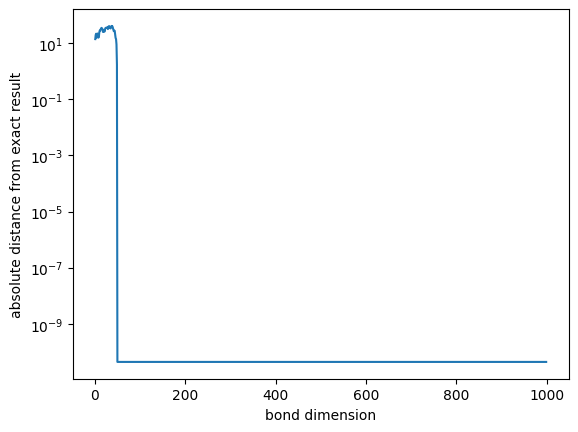

In [14]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(bonds, norms)
ax.set_xlabel('bond dimension')
ax.set_ylabel('absolute distance from exact result')